In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from src.data_manipulation import transform_data_datetime

# London Rainfall Data

source: [Copernicous Climate Data Store](https://cds.climate.copernicus.eu/)

In [14]:
# Hampstead 51.55338143494524, -0.1778743735609532

data = pd.read_csv('./output/london_weather_dataBACKUP.csv')
data.head()

,time,step,number,surface,latitude,longitude,valid_time,tp,actual_latitude,actual_longitude,target_latitude,target_longitude
0,2021-12-31 18:00:00,0 days 01:00:00,0,0.0,51.6,-0.2,2021-12-31 19:00:00,NaN,51.6,-0.2,51.5074,-0.1278
1,2021-12-31 18:00:00,0 days 12:00:00,0,0.0,51.6,-0.2,2022-01-01 06:00:00,2.868473e-07,51.6,-0.2,51.5074,-0.1278
2,2021-12-31 18:00:00,0 days 11:00:00,0,0.0,51.6,-0.2,2022-01-01 05:00:00,0.000000e+00,51.6,-0.2,51.5074,-0.1278
3,2021-12-31 18:00:00,0 days 10:00:00,0,0.0,51.6,-0.2,2022-01-01 04:00:00,0.000000e+00,51.6,-0.2,51.5074,-0.1278
4,2021-12-31 18:00:00,0 days 08:00:00,0,0.0,51.6,-0.2,2022-01-01 02:00:00,0.000000e+00,51.6,-0.2,51.5074,-0.1278


In [15]:
# data['datetime'] = pd.to_datetime(data['time'], format='%Y-%m-%d %H:%M:%S')
data['valid_datetime'] = pd.to_datetime(data['valid_time'], format='%Y-%m-%d %H:%M:%S')


In [16]:
data.sort_values(by='valid_datetime', inplace=True)
data.reset_index(drop=True, inplace=True)

In [17]:
data.head(5)

,time,step,number,surface,latitude,longitude,valid_time,tp,actual_latitude,actual_longitude,target_latitude,target_longitude,valid_datetime
0,2021-12-31 18:00:00,0 days 01:00:00,0,0.0,51.6,-0.2,2021-12-31 19:00:00,NaN,51.6,-0.2,51.5074,-0.1278,2021-12-31 19:00:00
1,2021-12-31 18:00:00,0 days 02:00:00,0,0.0,51.6,-0.2,2021-12-31 20:00:00,NaN,51.6,-0.2,51.5074,-0.1278,2021-12-31 20:00:00
2,2021-12-31 18:00:00,0 days 03:00:00,0,0.0,51.6,-0.2,2021-12-31 21:00:00,NaN,51.6,-0.2,51.5074,-0.1278,2021-12-31 21:00:00
3,2021-12-31 18:00:00,0 days 04:00:00,0,0.0,51.6,-0.2,2021-12-31 22:00:00,NaN,51.6,-0.2,51.5074,-0.1278,2021-12-31 22:00:00
4,2021-12-31 18:00:00,0 days 05:00:00,0,0.0,51.6,-0.2,2021-12-31 23:00:00,NaN,51.6,-0.2,51.5074,-0.1278,2021-12-31 23:00:00


In [18]:
data['year'] = data['valid_datetime'].dt.year
# data['month int'] = data['valid_datetime'].dt.month
# data['day'] = data['valid_datetime'].dt.day
# data['month'] = data['valid_datetime'].dt.strftime('%b')
# data['month'] = pd.Categorical(data['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
#                                                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)

In [19]:
data['RR_mm'] = data['tp'] * 1000

yearly_agg = (data[(data['year'] > 2021) &(data['year'] < 2025)]
              .groupby(['year'], observed=True)
              .agg(
                  RR_mm_total = ('RR_mm', 'sum'),
                  RR_mm_median = ('RR_mm', 'median'),
                  RR_mm_mean = ('RR_mm', 'mean'),
                  RR_mm_max = ('RR_mm', 'max'),
                  RR_mm_min = ('RR_mm', 'min'),
                  )
                  .reset_index()
                  )

yearly_agg.head()

,year,RR_mm_total,RR_mm_median,RR_mm_mean,RR_mm_max,RR_mm_min
0,2022,677.770736,0.000000,0.077371,8.899689,0.0
1,2023,797.295140,0.000387,0.091015,5.163908,0.0
2,2024,846.405576,0.001252,0.096358,4.390955,0.0


In [21]:
data['DATE'] = data['valid_datetime'].dt.date


In [31]:
daily_total_precipitation = (data[(data['year'] > 2021) &(data['year'] < 2025)]
 .groupby('DATE', observed=True)
 .agg(
     RR_daily_total=('RR_mm', 'sum'),
     RR_daily_max=('RR_mm', 'max'),
     )
     .reset_index()
)

In [ ]:
daily_total_precipitation = transform_data_datetime(daily_total_precipitation)

In [38]:
daily_total_precipitation['year'].unique()

array([2022, 2023, 2024])

In [40]:
daily_total_precipitation.head()

,DATE,RR_daily_total,RR_daily_max,datetime,year,month int,month,day
0,2022-01-01,0.204202,0.089064,2022-01-01,2022,1,Jan,1
1,2022-01-02,2.773235,0.746131,2022-01-02,2022,1,Jan,2
2,2022-01-03,0.118360,0.084102,2022-01-03,2022,1,Jan,3
3,2022-01-04,3.162175,0.685900,2022-01-04,2022,1,Jan,4
4,2022-01-05,0.000000,0.000000,2022-01-05,2022,1,Jan,5


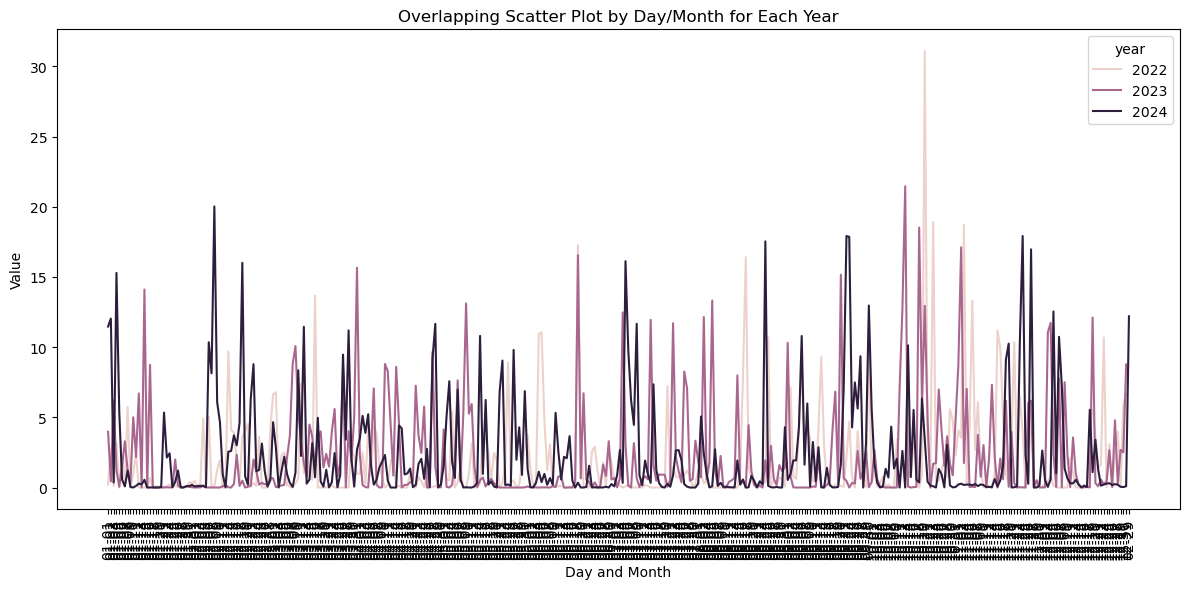

In [46]:
df_plot = daily_total_precipitation[['datetime', 'year', 'RR_daily_total']].copy()
df_plot['day_month'] = df_plot['datetime'].dt.strftime('%m-%d')

# Set plot size
plt.figure(figsize=(12, 6))


sns.lineplot(
    data=df_plot,
    x='day_month',
    y='RR_daily_total',
#    marker='o',
    hue='year',
#    color='blue',
#    label='Daily Total Precipitation'
)

plt.xlabel('Day and Month')
plt.ylabel('Value')
plt.title('Overlapping Scatter Plot by Day/Month for Each Year')
plt.xticks(rotation=90)
plt.tight_layout();

3.0